In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [145]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/daily_spending - Sheet1.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
print(df.columns.tolist())
df.dtypes

['Date', 'Total Screen Time of Phone(mins)', 'Time on Shopping Apps (mins)', 'Time on Social Media (mins)', 'Money Spent (TL)', 'Purchase Type', 'Time of Purchase', 'Ad Exposure Before Purchase (Yes/No)']


,0
Date,object
Total Screen Time of Phone(mins),int64
Time on Shopping Apps (mins),int64
Time on Social Media (mins),int64
Money Spent (TL),float64
Purchase Type,object
Time of Purchase,object
Ad Exposure Before Purchase (Yes/No),object


In [147]:
# Preprocess columns
df['Date'] = pd.to_datetime(df['Date'])
df['Money Spent (TL)'] = df['Money Spent (TL)'].astype(float)
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({'yes': 1, 'no': 0})


In [148]:

df = pd.get_dummies(df, columns=['Time of Purchase', 'Purchase Type'])

In [149]:
df.head() #example of data set
df.describe()

,Date,Total Screen Time of Phone(mins),Time on Shopping Apps (mins),Time on Social Media (mins),Money Spent (TL),Ad Exposure Before Purchase (Yes/No)
count,43,43.000000,43.000000,43.000000,43.000000,42.000000
mean,2025-04-14 21:12:33.488371968,261.023256,23.604651,159.790698,494.463488,0.404762
min,2025-04-07 00:00:00,121.000000,2.000000,56.000000,0.000000,0.000000
25%,2025-04-10 12:00:00,239.000000,10.500000,126.000000,154.450000,0.000000
50%,2025-04-14 00:00:00,277.000000,22.000000,181.000000,290.000000,0.000000
75%,2025-04-19 00:00:00,301.000000,29.000000,198.000000,607.620000,1.000000
max,2025-04-23 00:00:00,365.000000,76.000000,252.000000,2180.200000,1.000000
std,NaN,65.731593,17.585356,59.703457,509.451127,0.496796


<Axes: title={'center': 'Money Spent (TL)'}>

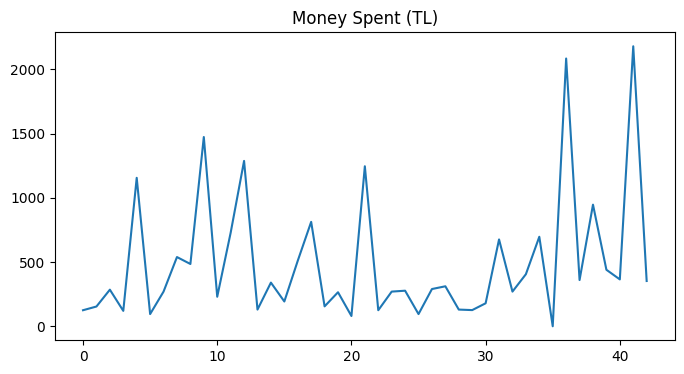

In [150]:
#  Money Spent (TL)

from matplotlib import pyplot as plt
df['Money Spent (TL)'].plot(kind='line', figsize=(8, 4), title='Money Spent (TL)')

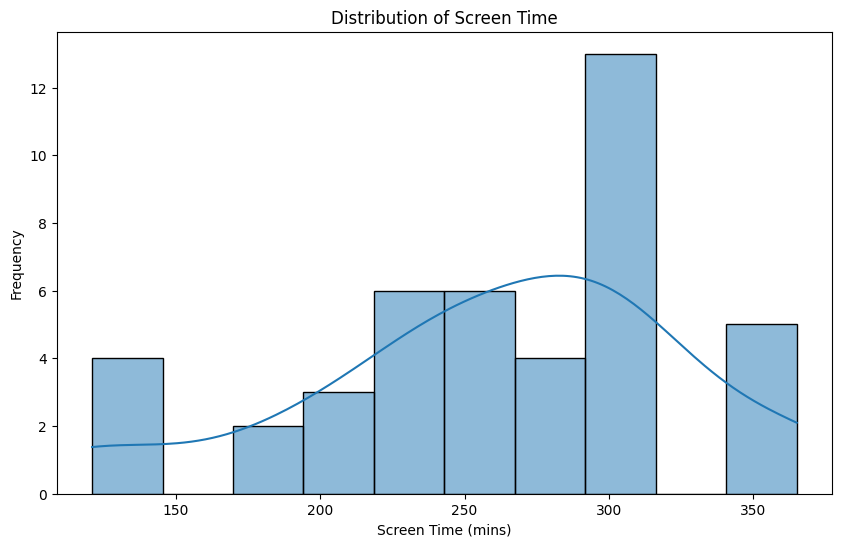

In [151]:

# Histogram: Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time of Phone(mins)'], kde=True, bins=10)
plt.title("Distribution of Screen Time")
plt.xlabel("Screen Time (mins)")
plt.ylabel("Frequency") #days
plt.show()

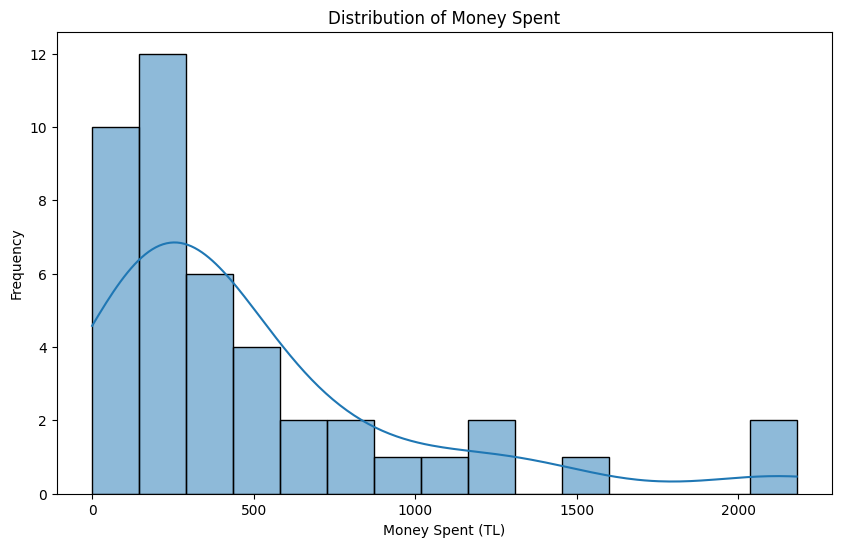

In [153]:
# Histogram: Money Spent
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Spent (TL)'], kde=True, bins=15)
plt.title("Distribution of Money Spent")
plt.xlabel("Money Spent (TL)")
plt.ylabel("Frequency")
plt.show()

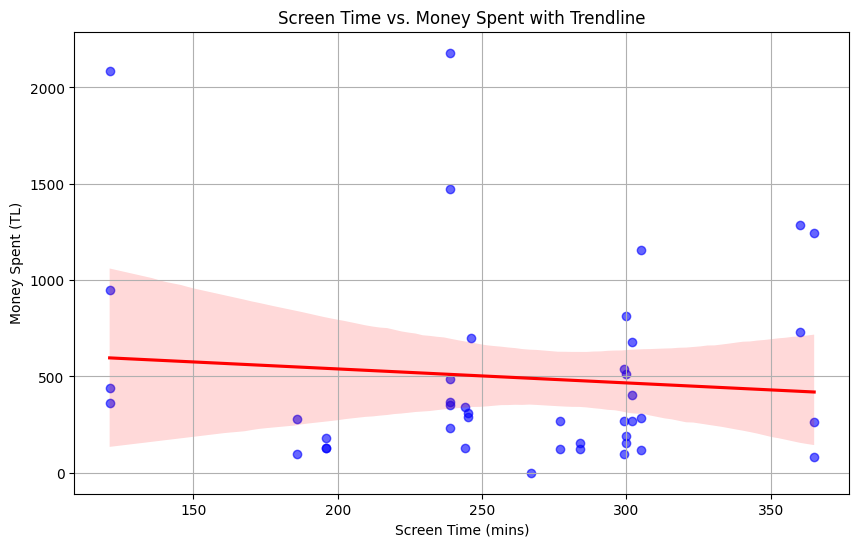

In [154]:
# Scatterplot: Screen Time vs Spending with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Screen Time of Phone(mins)', y='Money Spent (TL)', data=df, color='blue', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Screen Time vs. Money Spent with Trendline")
plt.xlabel("Screen Time (mins)")
plt.ylabel("Money Spent (TL)")
plt.grid(True)
plt.show()

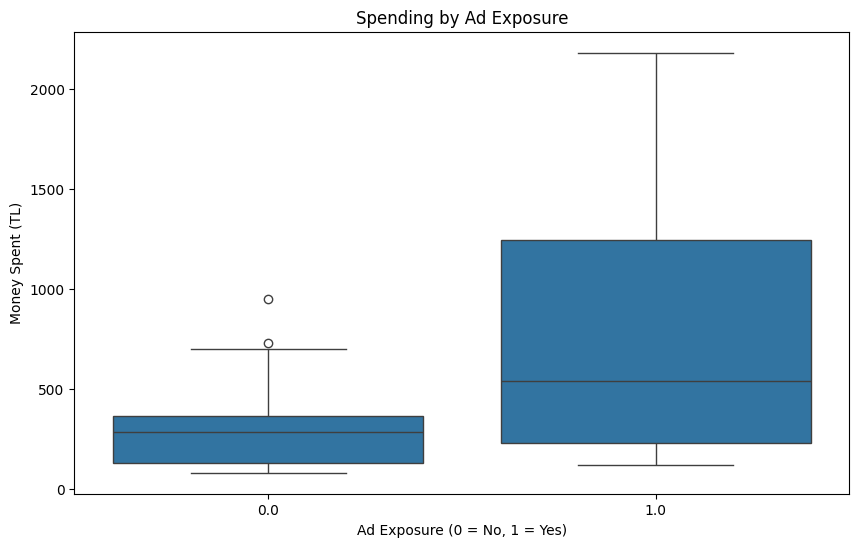

In [155]:
# Boxplot: Ad exposure vs Spending
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ad Exposure Before Purchase (Yes/No)', y='Money Spent (TL)', data=df) # Changed x to the original column name
plt.title("Spending by Ad Exposure")
plt.xlabel("Ad Exposure (0 = No, 1 = Yes)")
plt.ylabel("Money Spent (TL)")
plt.show()

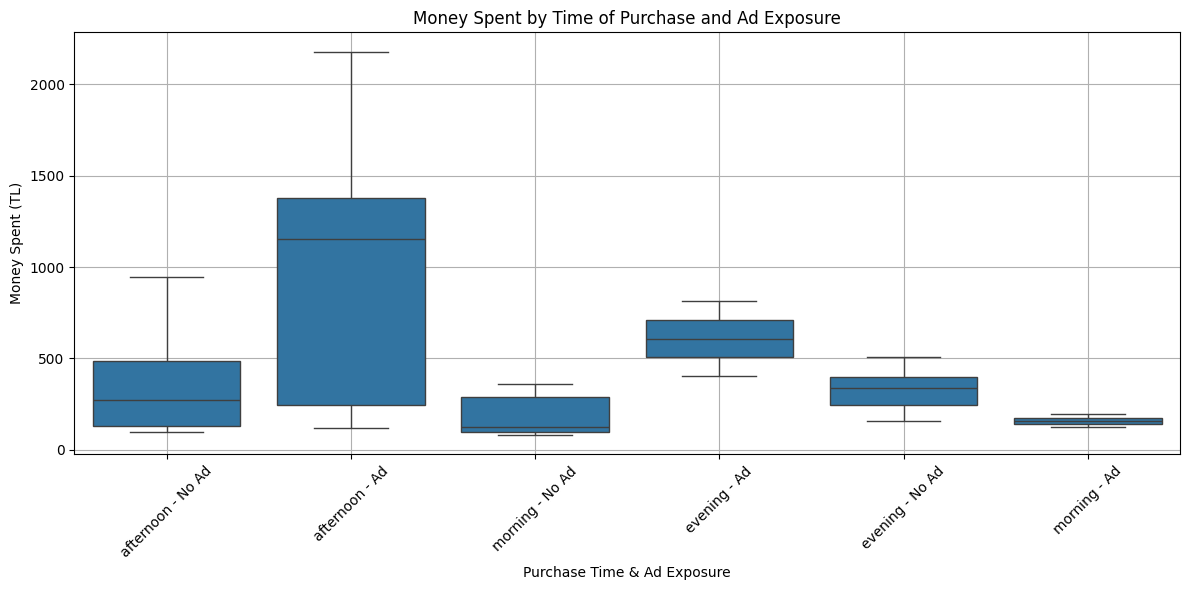

In [156]:
# Assuming 'Time of Purchase_Morning', 'Time of Purchase_Afternoon', 'Time of Purchase_Evening'
# are the new columns created by get_dummies, BUT THEY ARE NOT.
# Instead, we have Time of Purchase_afternoon, Time of Purchase_evening, Time of Purchase_morning
# First combine the dummy columns back into a single 'Time of Purchase' column
# Correct the column names to match the actual column names in your DataFrame
df['Time of Purchase'] = df[['Time of Purchase_afternoon', 'Time of Purchase_evening', 'Time of Purchase_morning']].idxmax(axis=1)
df['Time of Purchase'] = df['Time of Purchase'].str.replace('Time of Purchase_', '') # Clean up the column name

# Now you can proceed with the original code
df['Time of Purchase'] = df['Time of Purchase'].str.strip()
# Map 'Ad Exposure Before Purchase (Yes/No)' to 'Ad' and 'No Ad'
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({1: 'Ad', 0: 'No Ad'})

# Create a new column that combines both
df['Purchase Context'] = df['Time of Purchase'] + " - " + df['Ad Exposure Before Purchase (Yes/No)']

# Filter out categories in 'Purchase Context' with too few data points
# Get value counts for each category in 'Purchase Context'
counts = df['Purchase Context'].value_counts()
# Filter out categories with less than a minimum number of data points (e.g., 2)
filtered_df = df[df['Purchase Context'].isin(counts[counts >= 2].index)]


# Plot
plt.figure(figsize=(12, 6))
# Use filtered_df instead of df in the boxplot
sns.boxplot(x='Purchase Context', y='Money Spent (TL)', data=filtered_df)
plt.title("Money Spent by Time of Purchase and Ad Exposure")
plt.xticks(rotation=45)
plt.ylabel("Money Spent (TL)")
plt.xlabel("Purchase Time & Ad Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()

In [157]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['Total Screen Time of Phone(mins)'], df['Money Spent (TL)'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")

Pearson Correlation Coefficient: -0.09
P-Value: 0.5502
The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.
